In [1]:
%matplotlib TkAgg
import mne
import numpy as np
import pickle
import torch

import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

Channels marked as bad:
none


In [2]:
factor = 10**6

kmeansData = np.load('G:/My Drive/NeuroResearch/Data/eegCompress/processedData/kmeansSVD001.npz')
centers = kmeansData['arr_0'].transpose()

print(centers.shape)

dataList = np.load('G:/My Drive/NeuroResearch/Data/eegCompress/processedData/elimPeaksSVD001.npz')
block = dataList['arr_7'] * factor

(19, 1024)


In [11]:
centers.shape

(19, 1024)

In [12]:
def indexMinDistance(thisDiff, centers):
    minDistance = np.inf
    rows, cols = centers.shape
    for i in range(cols):
        thisCenter = centers[:,i]
        thisDistance = np.linalg.norm(thisDiff - thisCenter)
        if thisDistance < minDistance:
            minIndex = i
    return minIndex

In [13]:
reconstruct = np.zeros_like(block)
reconstruct[:,0] = block[:,0]

nChannel, nSample = reconstruct.shape
for i in range(nSample - 1):
    #reconstruct[:,i + 1] = reconstruct[:, i] + centers[:, indices[i]]

    thisDiff =  block[:,i + 1]  - reconstruct[:, i]
    thisIndex = indexMinDistance(thisDiff, centers)
    reconstruct[:,i + 1] = reconstruct[:, i] + centers[:,thisIndex]

print(reconstruct.shape)

Creating RawArray with float64 data, n_channels=19, n_times=1100367
    Range : 0 ... 1100366 =      0.000 ...  4298.305 secs
Ready.
Using matplotlib as 2D backend.


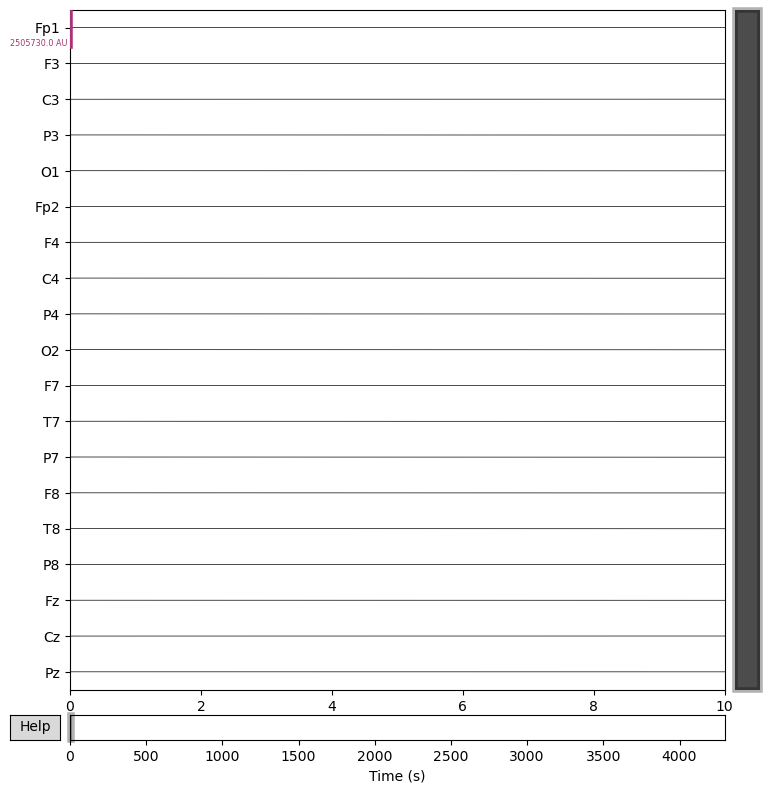

In [5]:
goodChannels = ['Fp1','F3','C3','P3','O1','Fp2','F4','C4','P4','O2','F7','T7','P7','F8','T8','P8','Fz','Cz','Pz']

info = mne.create_info(goodChannels, 256)
tempRaw = mne.io.RawArray(reconstruct, info)
tempRaw.plot()

In [21]:
np.min(reconstruct), np.max(reconstruct)

(np.float64(-0.0011173209886466016), np.float64(0.001802546819123737))